In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from shared.IRL_analyser import IRL_analyser
from shared.obtain_q import q_analyser
import argparse
from shared.boost_action import polish_index,boost_action
import scipy.stats
from sklearn.linear_model import LinearRegression
import pingouin
import pandas as pd
from sklearn import preprocessing

os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use this GPU
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
##analysis setup

num_sub = 47
setup = argparse.ArgumentParser().parse_args([])
setup.from_data = True #data or dqn
setup.full_space = True #full state space
setup.recent_model = False ## use the newest model instead of the best discrete model
setup.max_model = True ## use dqn_max instead of dqn_maxiter
setup.reward_outlier_removal = False
setup.state_only = False
setup.transform_old = False #old transformation method (distance max: 300, min: -20)
normalize_reward = True
action_boost = True #make the actions during the lane change as the triggering action (0 or 2)

if setup.from_data:
    setup.keyword = '35qb120_boost_take' #IRL ouput name
else:
    setup.keyword = '35qbLow50120_512_take' #IRL ouput name
    
setup.starting_number = 2 #starting number of IRL output
setup.num_sim = 1 #number of IRL iterations saved
setup.gpu_fraction = 0.15 #fraction of GPU to use
setup.num_sub = num_sub #number of subjects

sub_list = np.arange(num_sub)
num_sub = len(sub_list)

starting_sub = 302
setup.sub_list = sub_list + starting_sub

min_speed = 20
max_speed = 120
speed_step = 10

In [3]:
##load data

df = pd.read_csv('behavior_v2/survey_data/data_survey.csv')
gender_str = np.array(df.sex)
gender = np.array([gender_str[x] == 'Male' for x in range(len(gender_str))])+1 #1=female, 2=male
age = np.array(df.age_month)
BIS = np.array(df.bis_total)

BIS_cog = np.array(df.bis_l2_cog_imp)
BIS_motor = np.array(df.bis_l2_motor_imp)
BIS_nonplan = np.array(df.bis_l2_nonplanning_imp)

df_ddt = pd.read_csv('behavior_v2/survey_data/data_ddt.csv')
DDT = np.array(df_ddt.ddt_logk)

df_gng = pd.read_csv('behavior_v2/survey_data/data_gng.csv')
gng_error = np.array(df_gng.error_rate)
gng_rt = np.array(df_gng.go_rt)

In [27]:
##load IRL data

num_action = 5
pred_match_list = np.zeros((num_action+1,num_sub,3)) #action*sub*proportion/sample
window_match_list = pred_match_list.copy()

yList = []
for iSub in range(num_sub):
    # sub_id = 'sub'+str(iSub)
    
    sub_id = 'sub'+str(sub_list[iSub] + starting_sub)
    print(sub_id)

    setup.target_sub = sub_id

    ##IRL analyser
    analyser = IRL_analyser(setup)
    original_observations, expert_actions = analyser.load_trajectory()

    if analyser.setup.full_space:
        original_observations,expert_actions = analyser.obtain_full_space()

    expert_observations = analyser.model_prediction(original_observations,expert_actions)

    y = np.squeeze(analyser.raw_reward)
    
    if iSub == 0:
        yList = y
    else:
        yList = np.vstack((yList,y))
    
expert_observations = original_observations

distance_list = np.array([expert_observations[x][5+np.round(expert_observations[x,1]*2).astype(int)] for x in range(len(expert_observations))])
speed_list = np.array([expert_observations[x][0] for x in range(len(expert_observations))])
lane_list = expert_observations[:,1]

X = np.transpose([distance_list.tolist(), speed_list.tolist(), speed_list*distance_list.tolist()])

inf_filter = np.sum(np.isinf(yList),axis=0) == 0
yList = yList[:,inf_filter]
X = X[inf_filter]

expert_observations = expert_observations[inf_filter]

sub302
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 8600 batch size 8600
polished action0: 4 out of 512
polished action2: 5 out of 516
loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub302_35qb120_boost_take2/best_acc_model.ckpt
deleted 74 inf rewards
9542 outliers detected
sub303
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 10100 batch size 10100
polished action0: 2 out of 370
polished action2: 3 out of 365
loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information

fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub315_35qb120_boost_take2/best_acc_model.ckpt
deleted 162 inf rewards
11228 outliers detected
sub316
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9200 batch size 9200
polished action0: 2 out of 265
polished action2: 2 out of 261
loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub316_35qb120_boost_take2/best_acc_model.ckpt
deleted 310 inf rewards
10662 outliers detected
sub317
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9800 batch size 9800

loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub329_35qb120_boost_take2/best_acc_model.ckpt
deleted 838 inf rewards
11468 outliers detected
sub330
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9300 batch size 9300
polished action0: 6 out of 295
polished action2: 1 out of 287
loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub330_35qb120_boost_take2/best_acc_model.ckpt
deleted 905 inf rewards
12570 outliers detected
sub331
merged space is not used for dqn results
old transform

state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub343_35qb120_boost_take2/best_acc_model.ckpt
deleted 95 inf rewards
10569 outliers detected
sub344
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc_model.ckpt
boost actions
polish actions
sample size 9900 batch size 9900
polished action0: 1 out of 237
polished action2: 1 out of 235
loading full space across participants
boost actions
polish actions
state_only False
state_only loaded False
no optimizer information loaded
fixed lr_value 0.0005 lr_policy 0.0005
fixed lr_discrim 0.0001
recovered trained_models_AIRL/Highway_sub344_35qb120_boost_take2/best_acc_model.ckpt
deleted 2018 inf rewards
10971 outliers detected
sub345
merged space is not used for dqn results
old transformation False
no target model, use the default one
irl model: best_acc

In [28]:
###standardize
or_yList = yList.copy()

if normalize_reward:
    scaled_yList = []
    
    for iScale in range(num_sub):
        target_data = or_yList[iScale][~np.isinf(or_yList[iScale])][:,None]
        scaler = preprocessing.StandardScaler().fit(target_data)
        y_scaled = np.squeeze(scaler.transform(target_data)) #standardize
        # y_scaled = np.squeeze(preprocessing.normalize(target_data, norm='l2')) #normalize
        
        inf_index = np.squeeze(np.argwhere(np.isinf(or_yList[iScale])))
        y_scaled_inf = np.empty(len(or_yList[iScale]), dtype = y_scaled.dtype)
        y_scaled_inf[inf_index] = float("inf")
        y_scaled_inf[np.isin(np.arange(len(y_scaled_inf)), inf_index, invert=True)] = y_scaled
        
        scaled_yList.append(y_scaled_inf)
        
        # print(np.mean(y_scaled))

    yList = np.array(scaled_yList.copy())

In [29]:
## speed and distance bin indices
speed_index = np.zeros(speed_list.shape)
for iSpeed in range(11):
    index = (speed_list > (iSpeed*0.1)-0.05) * (speed_list < (iSpeed*0.1)+0.05)
    speed_index[index] = iSpeed
    
speed_index = speed_index[inf_filter]

distance_index = np.zeros(distance_list.shape)
for iDistance in range(11):
    index = (distance_list > (iDistance*0.1)-0.05) * (distance_list < (iDistance*0.1)+0.05)
    distance_index[index] = iDistance
    
distance_index = distance_index[inf_filter]

In [30]:
##correlation between BIS and reward values
corr_list = [np.corrcoef(BIS,yList[:,x])[0,1] for x in range(len(X))]

corr_by_speed = [np.mean(np.array(corr_list)[speed_index==x]) for x in range(11)]
reward_by_speed = np.array([np.mean(yList[:,speed_index==x],axis=1) for x in range(11)])
print("mean correlation by speed",np.around(corr_by_speed,2))

corr_by_distance = [np.mean(np.array(corr_list)[distance_index==x]) for x in range(11)]
reward_by_distance = np.array([np.mean(yList[:,distance_index==x],axis=1) for x in range(11)])
print("mean correlation by distance",np.around(corr_by_distance,2))

mean correlation by speed [ 0.03  0.02  0.02  0.02  0.01 -0.01 -0.02 -0.03 -0.02 -0.02 -0.03]
mean correlation by distance [ 0.04  0.01  0.   -0.   -0.    0.    0.    0.01  0.01  0.01  0.01]


In [31]:
corr_by_sd = np.zeros((11,11)) #speed, distance
reward_by_sd = np.zeros((11,11,len(sub_list)))
# freq_by_sd = np.zeros((11,11,len(sub_list)))

for iSpeed in range(11):
    for iDistance in range(11):
        sd_index = (speed_index==iSpeed) * (distance_index==iDistance)
        corr_by_sd[iSpeed,iDistance] = np.mean(np.array(corr_list)[sd_index])
        for iSub in range(len(sub_list)):
            reward_by_sd[iSpeed,iDistance,iSub] = np.mean(yList[iSub,sd_index])
            
reward_by_sd[np.isnan(reward_by_sd)] = 0 ##change NaN to 0 -> no correlation

corr_by_sd_mean = np.zeros((11,11,3))
# corr_by_sd_mean_freq = np.zeros((11,11,3))

for iSpeed in range(11):
    for iDistance in range(11):
        corr_by_sd_mean[iSpeed,iDistance,:2] = scipy.stats.pearsonr(reward_by_sd[iSpeed,iDistance,:],BIS)    
        bf_corr = pingouin.corr(reward_by_sd[iSpeed,iDistance,:],BIS, method='pearson').round(3)        
        corr_by_sd_mean[iSpeed,iDistance,2] = float(bf_corr.BF10.pearson)

([<matplotlib.axis.XTick at 0x15c9d5fdc40>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '21'),
  Text(4.0, 0, '42'),
  Text(6.0, 0, '63'),
  Text(8.0, 0, '84'),
  Text(10.0, 0, '105')])

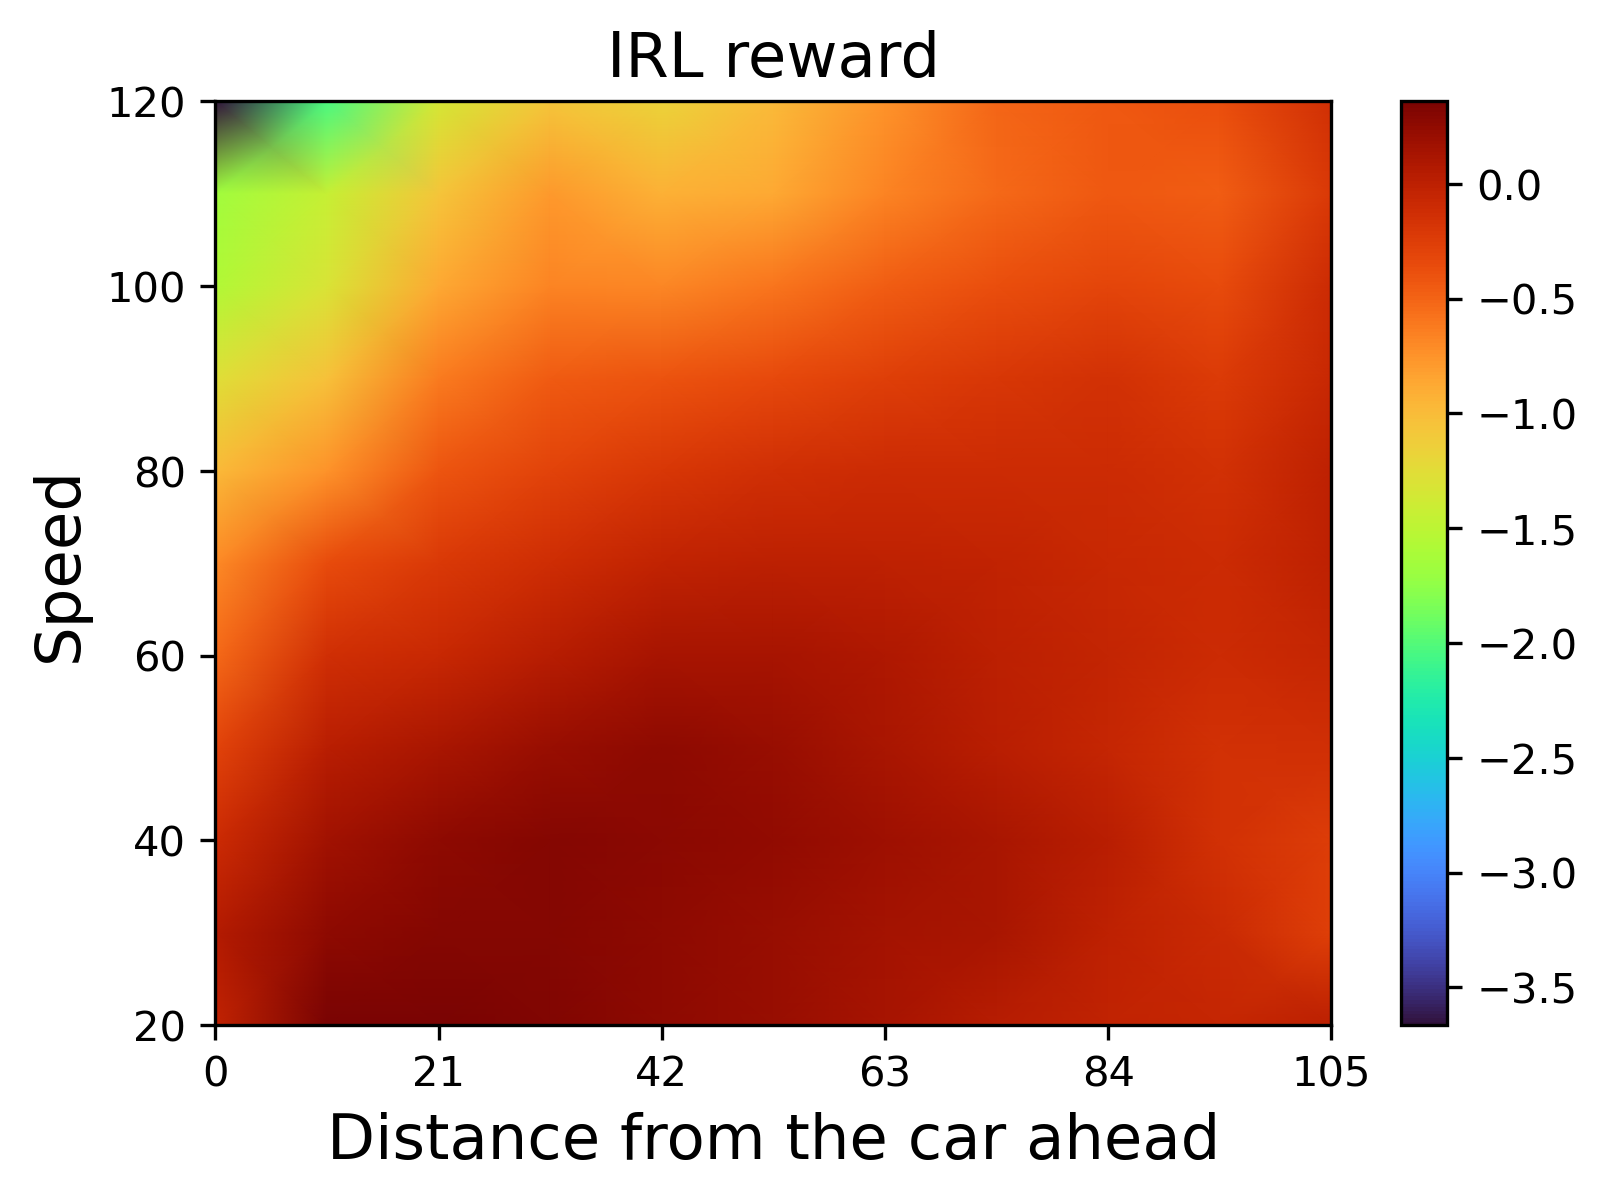

In [40]:
speed_grid = np.linspace(20,120,11)

##mean function
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(6,4))
c = plt.pcolormesh(np.mean(reward_by_sd,axis=2),cmap ='turbo',shading='gouraud')
plt.colorbar(c)
plt.ylabel('Speed',fontsize=15)
plt.xlabel('Distance from the car ahead',fontsize=15)
plt.title('IRL reward',fontsize=15)

plt.yticks(np.linspace(0,10,6),np.linspace(20,120,6).astype(int))
plt.xticks(np.linspace(0,10,6),np.linspace(0,105,6).astype(int))

([<matplotlib.axis.XTick at 0x15c9d375880>,
 [Text(0.0, 0, '20'),
  Text(2.0, 0, '40'),
  Text(4.0, 0, '60'),
  Text(6.0, 0, '80'),
  Text(8.0, 0, '100'),
  Text(10.0, 0, '120')])

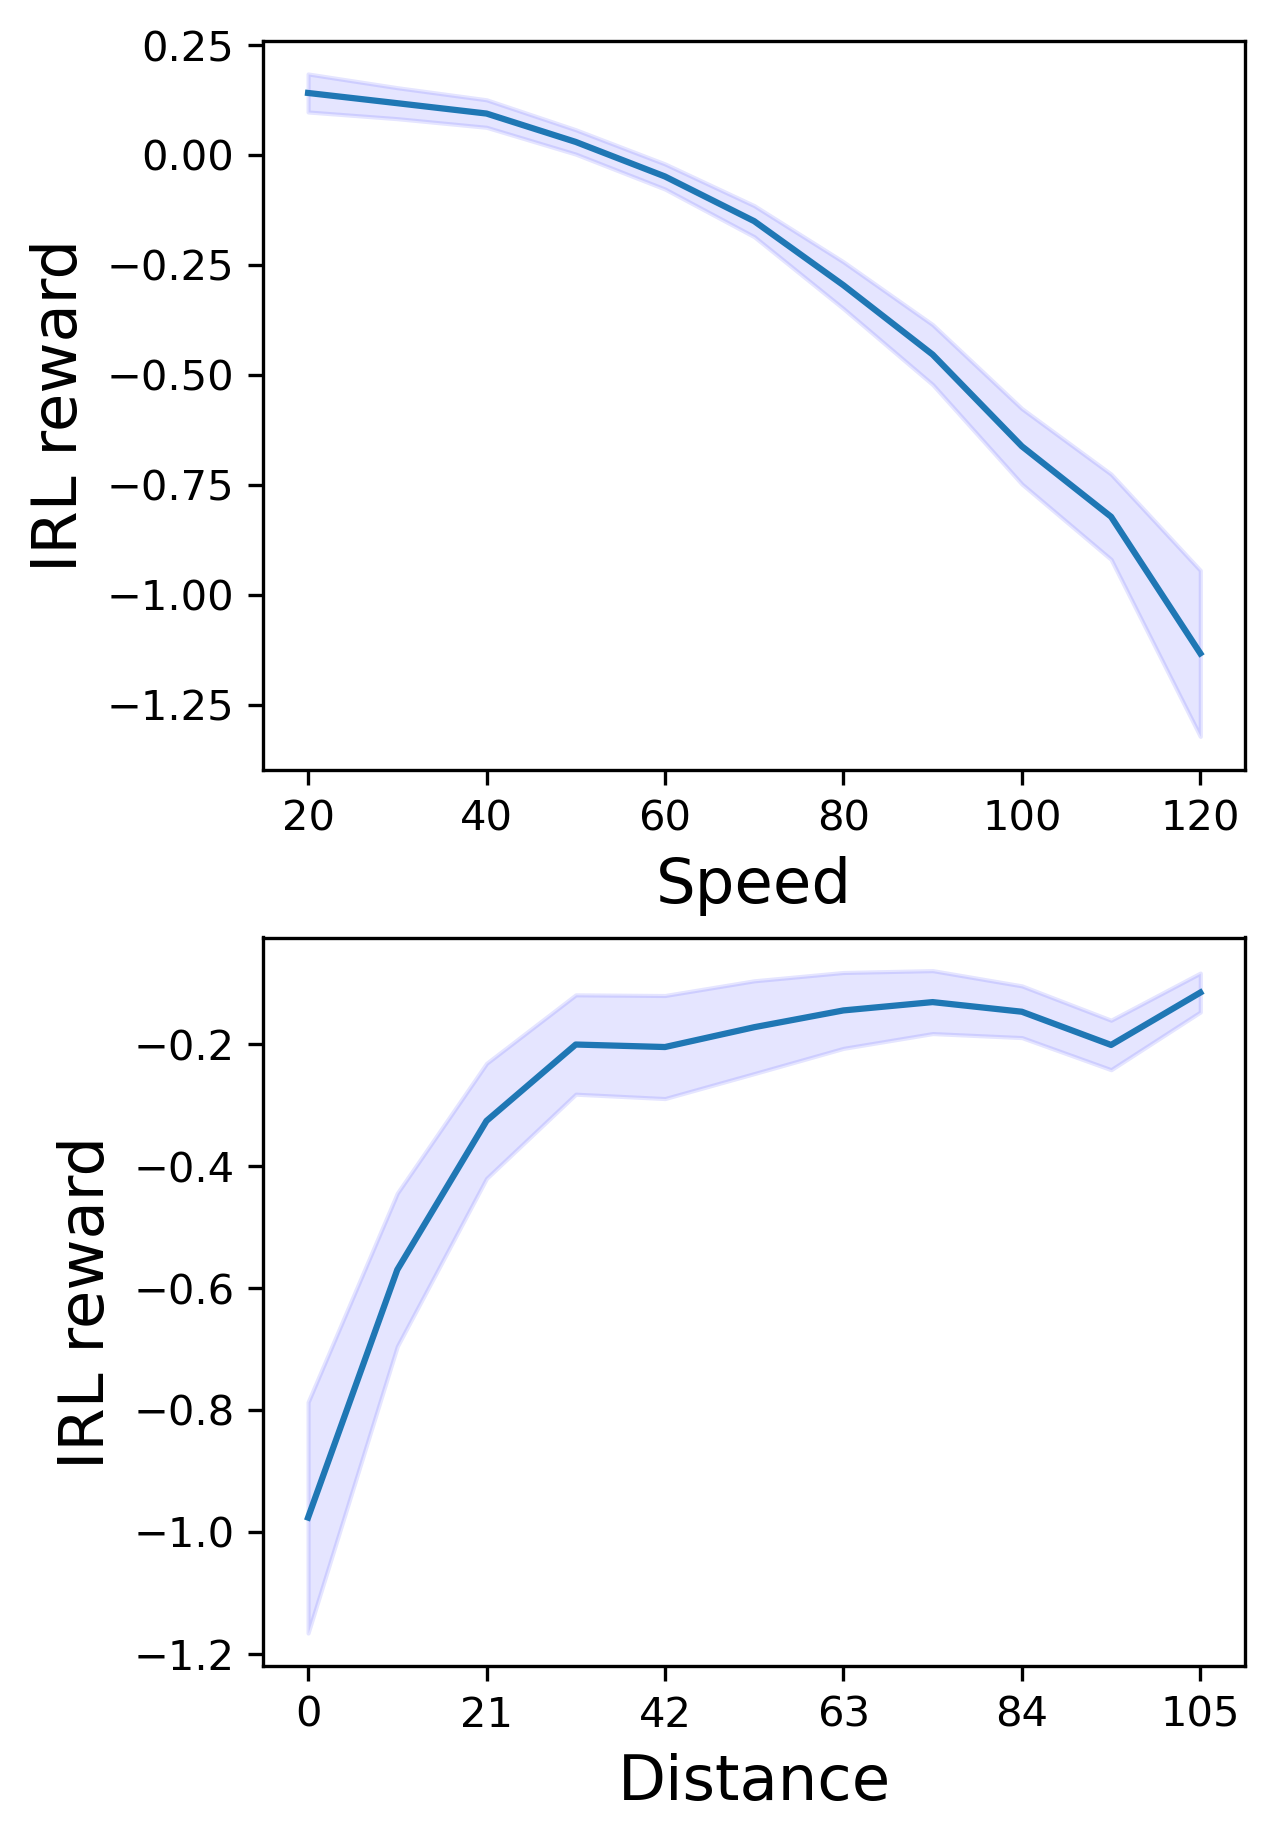

In [37]:
traj_length = 11
x = np.arange(traj_length)

fig,ax = plt.subplots(2,1,figsize = (4,6))
fig.tight_layout(w_pad=0,h_pad=2)
plt.subplot(2,1,2)

mean_score = np.mean(reward_by_sd,axis=(0,2))
ci_score = np.std(reward_by_sd,axis=(0,2))/np.sqrt(num_sub)
plt.plot(x,mean_score)
plt.fill_between(x,mean_score-ci_score, mean_score+ci_score, color='b', alpha=.1)

# plt.plot(np.mean(reward_by_sd,axis=(0,2)))
plt.xlabel('Distance',fontsize=15)
plt.ylabel('IRL reward',fontsize=15)
plt.xticks(np.linspace(0,10,6),np.linspace(0,105,6).astype(int))

plt.subplot(2,1,1)
mean_score = np.mean(reward_by_sd,axis=(1,2))
ci_score = np.std(reward_by_sd,axis=(1,2))/np.sqrt(num_sub)
plt.plot(x,mean_score)
plt.fill_between(x,mean_score-ci_score, mean_score+ci_score, color='b', alpha=.1)
plt.xlabel('Speed',fontsize=15)
plt.ylabel('IRL reward',fontsize=15)
plt.xticks(np.linspace(0,10,6),np.linspace(20,120,6).astype(int))

([<matplotlib.axis.XTick at 0x15cf1930ca0>,
 [Text(0.5, 0, '0'),
  Text(2.5, 0, '21'),
  Text(4.5, 0, '42'),
  Text(6.5, 0, '63'),
  Text(8.5, 0, '84'),
  Text(10.5, 0, '105')])

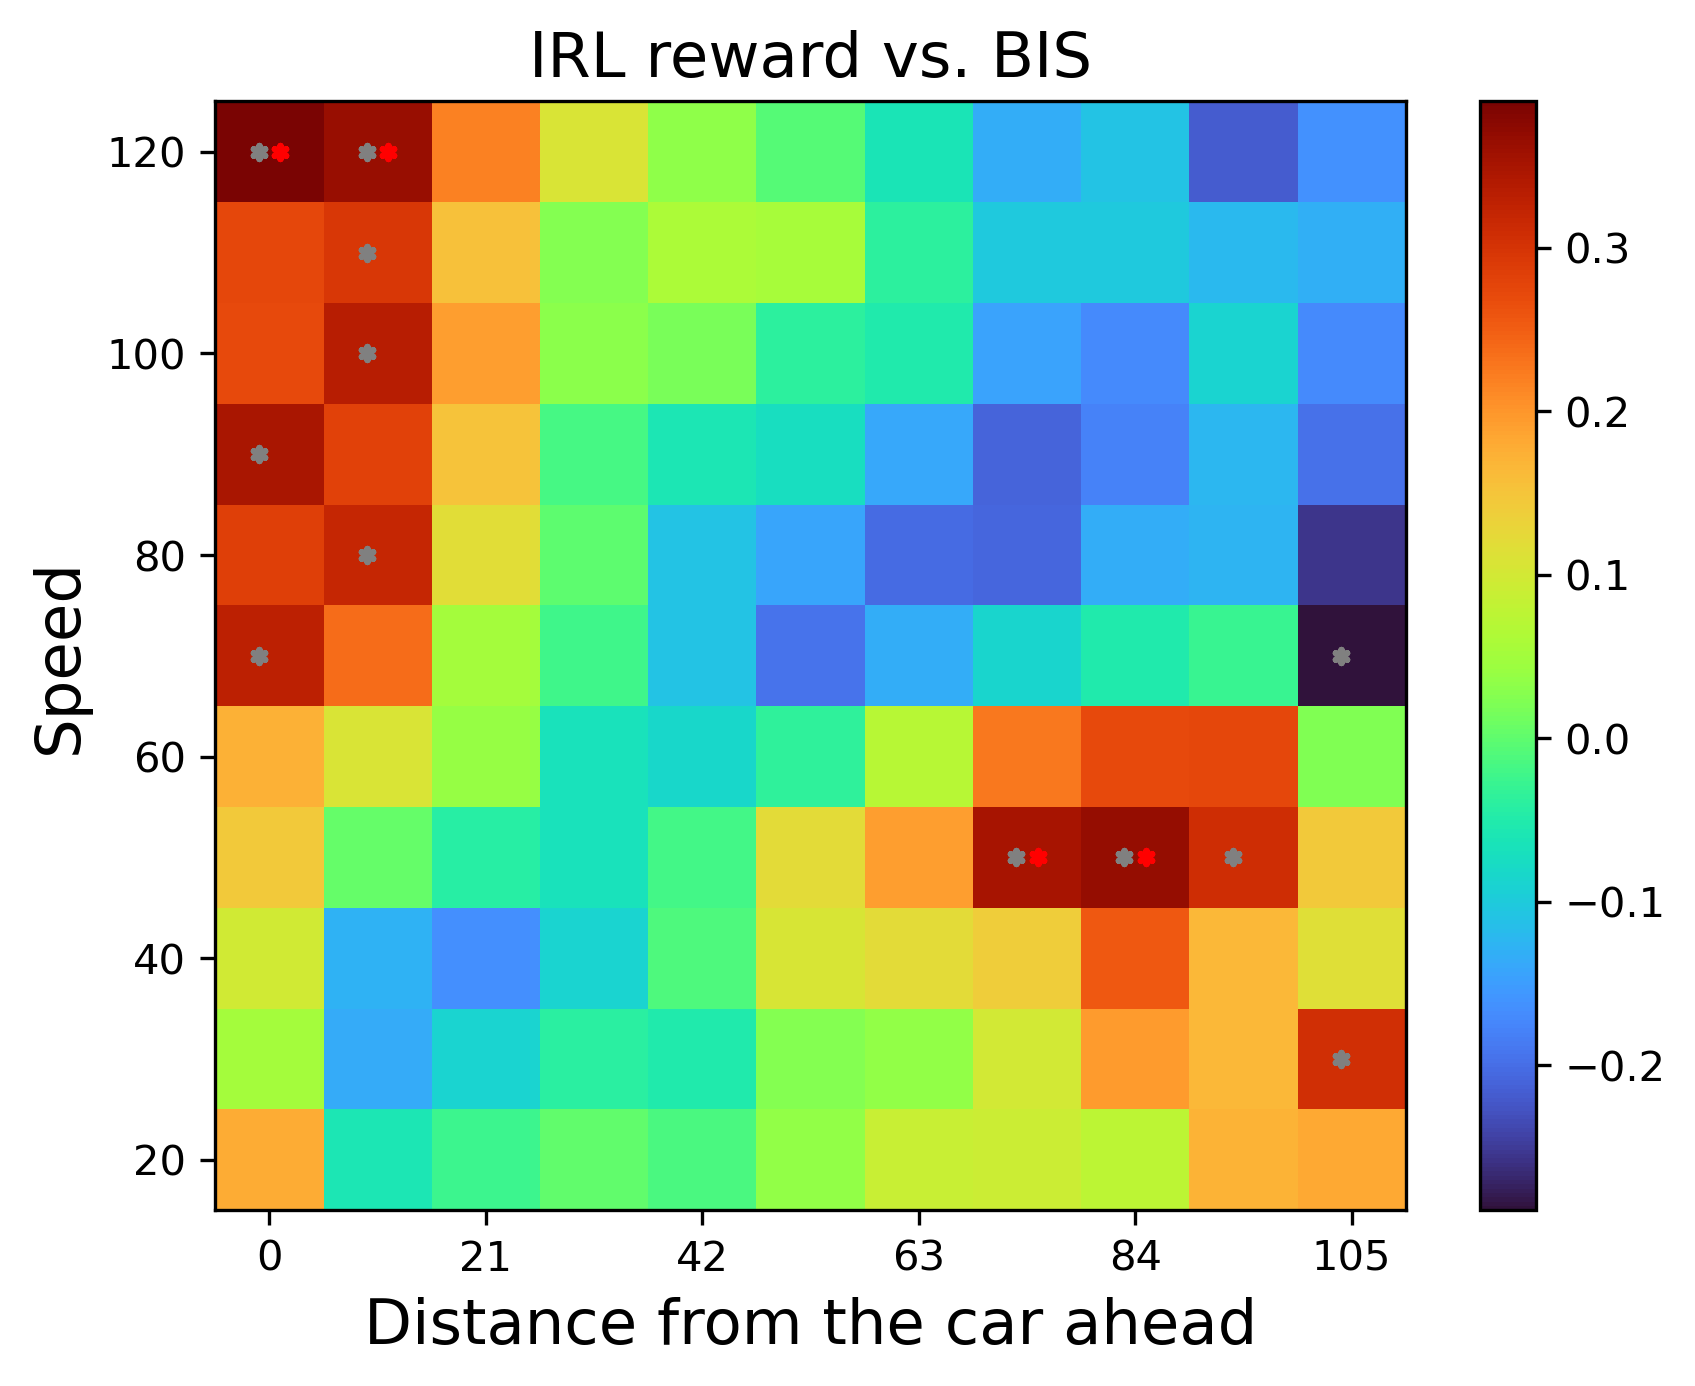

In [41]:
### correlation of the mean values
bf_loc = np.argwhere(corr_by_sd_mean[:,:,2]>3)
p_loc = np.argwhere(corr_by_sd_mean[:,:,1]<0.05)

c = plt.pcolormesh(corr_by_sd_mean[:,:,0],cmap ='turbo')
plt.colorbar(c)
plt.scatter(p_loc[:,1]+0.4,p_loc[:,0]+0.5,color = 'grey', s=10, marker = (6,2,0))
plt.scatter(bf_loc[:,1]+0.6,bf_loc[:,0]+0.5,color = 'red', s=10, marker = (6,2,0))
# plt.scatter(bf_loc[:,1]+0.5,bf_loc[:,0]+0.5,color = 'red', s=10, marker = (6,2,0))

plt.ylabel('Speed',fontsize=15)
plt.xlabel('Distance from the car ahead',fontsize=15)
plt.title('IRL reward vs. BIS',fontsize=15)
plt.yticks(np.linspace(0,10,6)+0.5,np.linspace(20,120,6).astype(int))
plt.xticks(np.linspace(0,10,6)+0.5,np.linspace(0,105,6).astype(int))